In [1]:
import pandas as pd
import numpy as np

# Load data
UCI adult dataset

In [2]:
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours",
    "native",
    "class"
]

In [3]:
data = pd.read_csv(link, names=names)

In [4]:
data.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours,native,class
28474,69,Private,130060,HS-grad,9,Separated,Transport-moving,Unmarried,Black,Female,2387,0,40,United-States,<=50K
29983,50,Private,155574,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
5242,35,State-gov,82622,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,80,United-States,<=50K
21714,28,Private,271572,9th,5,Never-married,Other-service,Other-relative,White,Male,0,0,52,United-States,<=50K
18359,29,Private,206351,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [5]:
print(data.shape)

(32561, 15)


## detect class imbalance

<AxesSubplot:>

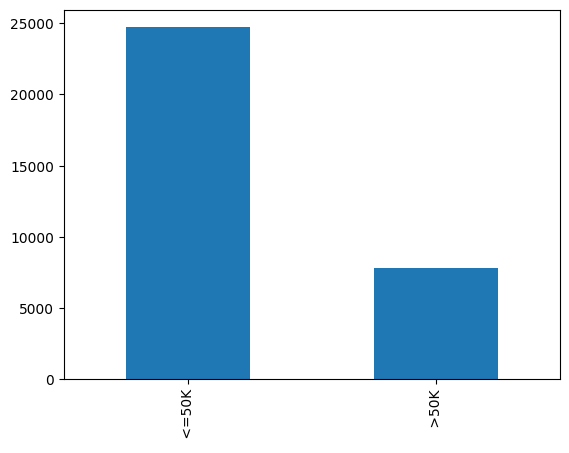

In [6]:
g = data[names[-1]].value_counts()
g.plot.bar()

In [7]:
types = data.dtypes
print(types)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours              int64
native            object
class             object
dtype: object


## detect NA values

In [11]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours             0
native            0
class             0
dtype: int64

## Encode categorical features into numerical ones 

In [8]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

for ft in names:
    if data[ft].dtype == "object":
        le.fit_transform(data[ft])
        data[ft] = le.transform(data[ft])

In [9]:
data.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours,native,class
31719,43,4,171438,8,11,5,12,4,4,0,0,0,45,39,0
8723,18,4,156874,2,8,4,8,3,4,1,0,0,27,39,0
5113,59,1,243612,11,9,6,7,4,4,0,0,0,40,39,0


#

## Normalization